# *************************************
# Name - Abhishek Kumar 
# Batch Number - DS2309
# *************************************

# ==================================================
# Project Name - Student Grade Prediction
# ==================================================

# Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades


Columns Description -  total 43 columns
Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the candidate took exam.

# Predict 
CGPA of a student based on different grades in four years.

# Dataset Link-
•  https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Grades/Grades.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\ASHISH\Downloads\Grades.csv")

In [3]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [4]:
df.shape

(571, 43)

# Checking Null Values

In [5]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

<Axes: >

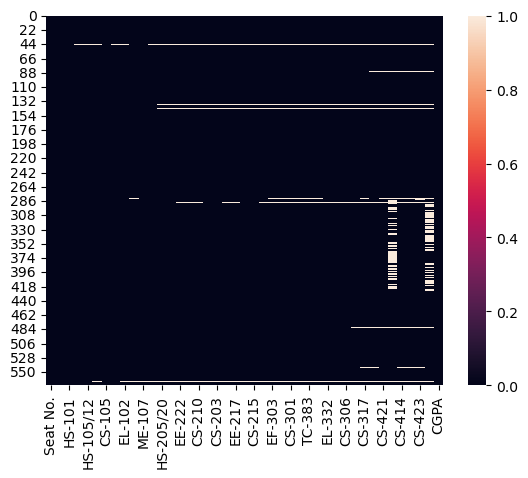

In [7]:
sns.heatmap(df.isnull())

### Filling Null Values with Constant (0)

In [8]:
df=df.fillna(0)

In [9]:
#verifying null values aviability 
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

### Conversion of Grades to Numeric Grade

In [10]:
grade_mapping={'A+':12,'A':11,'A-':10,'B+':9,'B':8,'B-':7,'C+':6,'C':5,'C-':4,'D+':3,'D':2,'D-':1,'F':0,'I':0,'WU':0,'W':0}

In [11]:
grade_columns = df.columns [df.columns.str.contains('-')]

df[grade_columns] = df[grade_columns].applymap(lambda x: grade_mapping.get(x, x))

# Display the modified DataFrame
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,7,3,4,5,4,3,2,4,7,...,4,4,4,4,10,11,4,8,10,2.205
1,CS-97002,11,2,3,2,7,5,2,11,3,...,3,2,5,2,10,7,5,5,8,2.008
2,CS-97003,11,8,11,7,9,11,7,9,10,...,8,8,11,5,11,11,11,10,11,3.608
3,CS-97004,2,6,3,2,2,10,3,4,2,...,3,5,3,4,7,8,6,6,6,1.906
4,CS-97005,10,10,10,9,11,11,10,9,11,...,7,9,9,7,10,11,10,10,11,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,8,11,11,10,12,11,10,10,12,...,10,10,11,11,11,9,9,8,11,3.798
567,CS-97568,12,11,11,11,11,11,11,10,11,...,9,9,11,11,10,8,10,5,10,3.772
568,CS-97569,8,11,10,9,11,11,11,11,11,...,10,8,11,9,11,5,9,10,10,3.470
569,CS-97570,11,9,2,11,2,3,7,4,7,...,2,8,8,4,2,5,8,7,5,2.193


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    int64  
 2   HS-101     571 non-null    int64  
 3   CY-105     571 non-null    int64  
 4   HS-105/12  571 non-null    int64  
 5   MT-111     571 non-null    int64  
 6   CS-105     571 non-null    int64  
 7   CS-106     571 non-null    int64  
 8   EL-102     571 non-null    int64  
 9   EE-119     571 non-null    int64  
 10  ME-107     571 non-null    int64  
 11  CS-107     571 non-null    int64  
 12  HS-205/20  571 non-null    int64  
 13  MT-222     571 non-null    int64  
 14  EE-222     571 non-null    int64  
 15  MT-224     571 non-null    int64  
 16  CS-210     571 non-null    int64  
 17  CS-211     571 non-null    int64  
 18  CS-203     571 non-null    int64  
 19  CS-214     571 non-null    int64  
 20  EE-217    

# Data Correlation 

In [13]:
df.corr()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.410174,0.636504,0.560640,0.517010,0.673049,0.332083,0.449411,0.663009,0.582222,...,0.112086,0.541938,0.434654,0.423376,0.471753,0.296822,0.535638,0.211203,0.568817,0.681972
HS-101,0.410174,1.000000,0.365760,0.492443,0.476163,0.445706,0.371177,0.389843,0.331654,0.371195,...,0.268563,0.417682,0.285907,0.371465,0.132976,0.293254,0.315672,0.286885,0.301803,0.562387
CY-105,0.636504,0.365760,1.000000,0.589894,0.594868,0.627412,0.430631,0.502955,0.571465,0.497068,...,0.364604,0.572712,0.607126,0.497574,0.241392,0.249915,0.575709,0.284397,0.378230,0.696745
HS-105/12,0.560640,0.492443,0.589894,1.000000,0.535651,0.551122,0.543661,0.386283,0.479424,0.390396,...,0.358769,0.556176,0.557190,0.510472,0.214411,0.241966,0.541399,0.332927,0.289629,0.669857
MT-111,0.517010,0.476163,0.594868,0.535651,1.000000,0.457649,0.573382,0.588204,0.458128,0.500935,...,0.561097,0.618508,0.519549,0.608685,0.136071,0.353472,0.588758,0.484768,0.239753,0.776671
CS-105,0.673049,0.445706,0.627412,0.551122,0.457649,1.000000,0.330159,0.387313,0.603357,0.502787,...,0.143378,0.463393,0.393735,0.376644,0.428246,0.276773,0.438078,0.184181,0.484054,0.644594
CS-106,0.332083,0.371177,0.430631,0.543661,0.573382,0.330159,1.000000,0.385000,0.316480,0.348181,...,0.560348,0.481078,0.558933,0.502206,0.043391,0.245445,0.536408,0.449586,0.101881,0.600557
EL-102,0.449411,0.389843,0.502955,0.386283,0.588204,0.387313,0.385000,1.000000,0.448338,0.488901,...,0.432689,0.530520,0.423403,0.464865,0.120521,0.400291,0.465209,0.467934,0.242073,0.675474
EE-119,0.663009,0.331654,0.571465,0.479424,0.458128,0.603357,0.316480,0.448338,1.000000,0.613082,...,0.229474,0.510228,0.440556,0.450193,0.370586,0.314828,0.530241,0.317567,0.446013,0.690414
ME-107,0.582222,0.371195,0.497068,0.390396,0.500935,0.502787,0.348181,0.488901,0.613082,1.000000,...,0.298056,0.536024,0.433352,0.480125,0.285847,0.290592,0.536689,0.329989,0.404073,0.696473


# Exploratory Data Analysis

<Axes: ylabel='Count'>

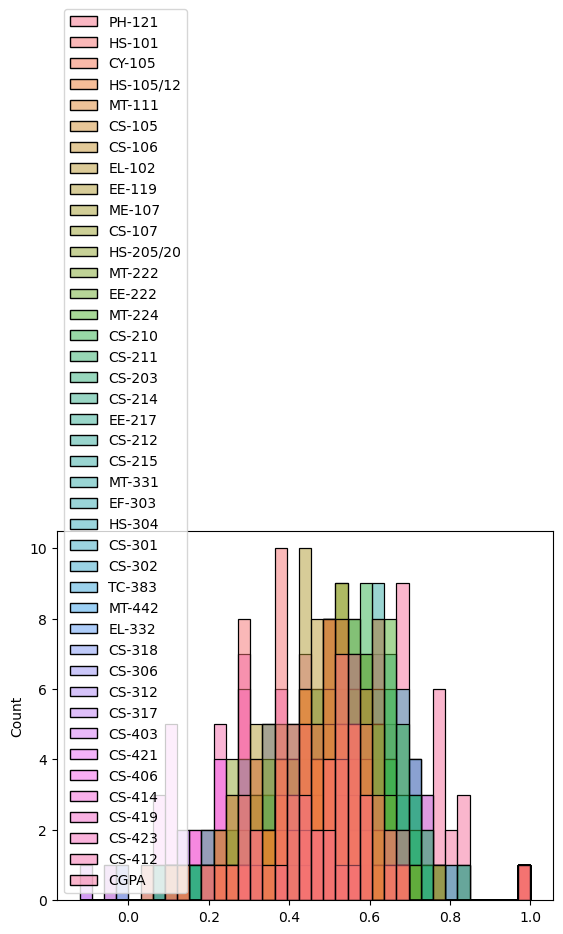

In [14]:
sns.histplot(df.corr())

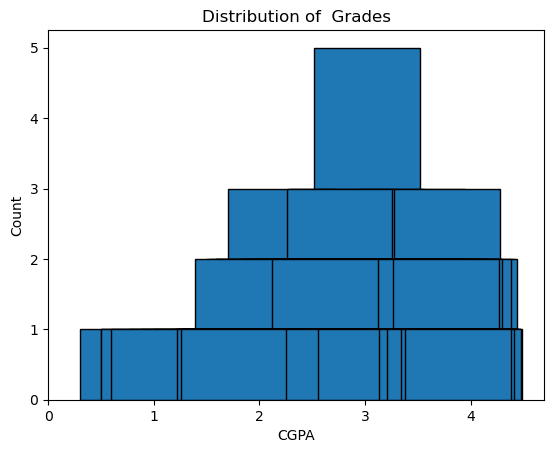

In [15]:
plt.bar(df['CGPA'].value_counts().index, 
        df['CGPA'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1)
plt.xlabel('CGPA'); plt.ylabel('Count'); plt.title('Distribution of  Grades');
plt.xticks(list(range(0, 5)));

## Grouping columns By subjects

In [16]:
grouped_columns = df.columns.str.split('-', expand=True).get_level_values(0)
grouped_columns

Index(['Seat No.', 'PH', 'HS', 'CY', 'HS', 'MT', 'CS', 'CS', 'EL', 'EE', 'ME',
       'CS', 'HS', 'MT', 'EE', 'MT', 'CS', 'CS', 'CS', 'CS', 'EE', 'CS', 'CS',
       'MT', 'EF', 'HS', 'CS', 'CS', 'TC', 'MT', 'EL', 'CS', 'CS', 'CS', 'CS',
       'CS', 'CS', 'CS', 'CS', 'CS', 'CS', 'CS', 'CGPA'],
      dtype='object')

In [17]:
grouped_columns.unique()

Index(['Seat No.', 'PH', 'HS', 'CY', 'MT', 'CS', 'EL', 'EE', 'ME', 'EF', 'TC',
       'CGPA'],
      dtype='object')

In [18]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [19]:
df.drop(columns=['Seat No.'], inplace=True)

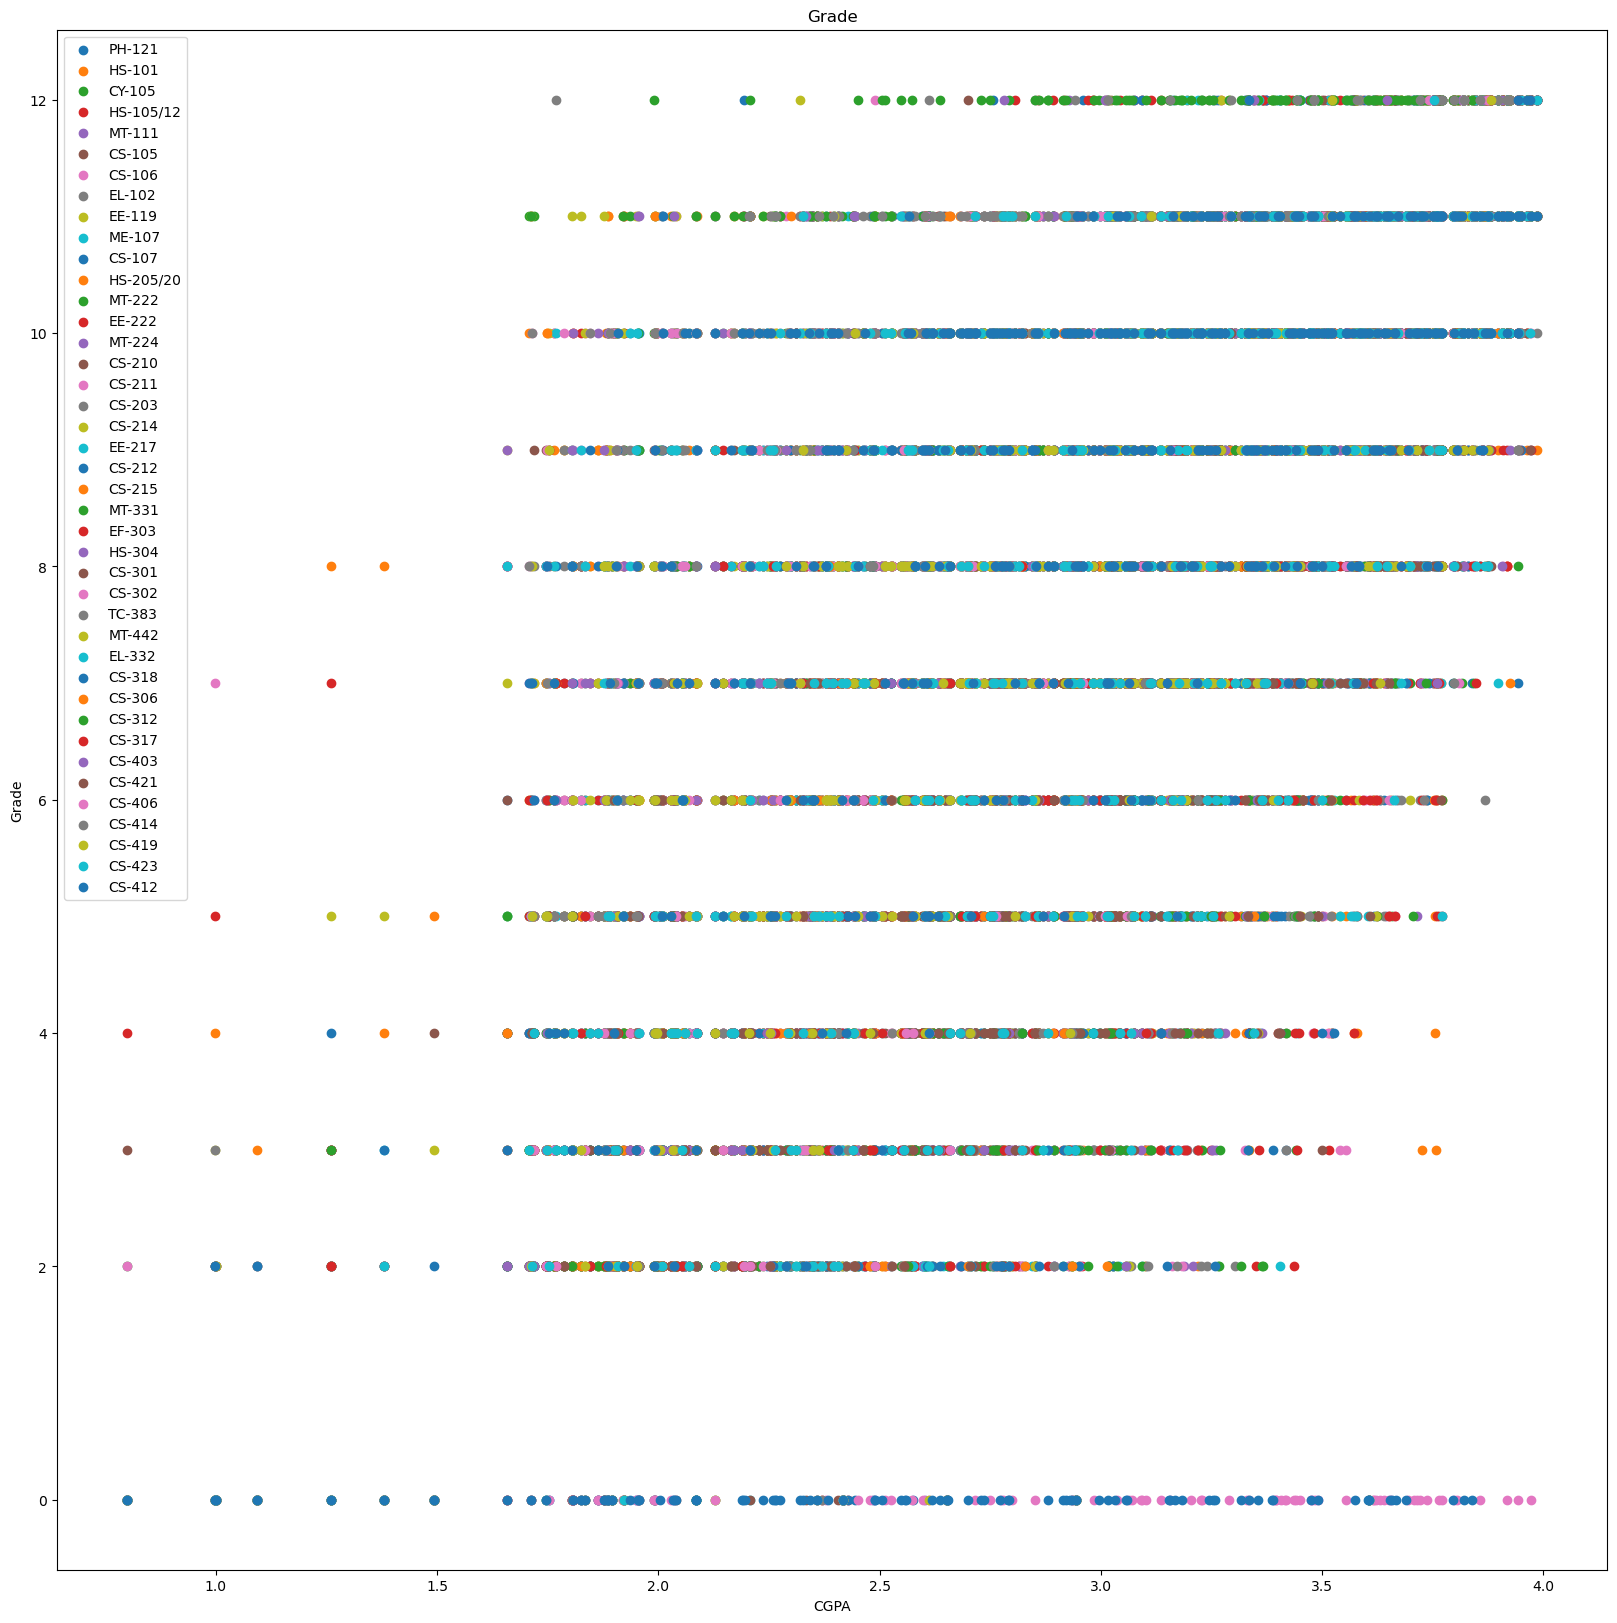

In [20]:
plt.figure(figsize=(20, 20))
for column in df.columns[0:-1]:
    plt.scatter(df['CGPA'], df[column], label=column)

plt.title('Grade')
plt.xlabel('CGPA')
plt.ylabel('Grade')
plt.legend()
plt.show()

In [23]:
# Splitting data in target and dependent feature
X = df.drop(['CGPA'], axis =1)
y = df['CGPA']

# Model Training 

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [91]:
X_train

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
375,2,5,8,7,7,7,9,11,3,5,...,2,10,3,5,5,0,8,4,10,5
374,5,9,11,9,11,8,9,9,7,6,...,11,12,10,11,8,0,11,8,11,9
161,11,10,10,9,10,11,10,8,7,10,...,10,10,11,10,3,10,10,10,6,8
469,11,10,12,11,11,12,8,10,9,9,...,9,12,10,11,9,11,9,11,11,10
126,10,2,10,8,9,11,3,10,10,10,...,8,4,5,5,4,9,10,6,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,3,8,7,7,4,11,6,4,5,2,...,8,2,2,5,5,8,11,5,7,8
536,11,6,11,7,10,12,5,9,9,9,...,9,11,9,10,11,11,8,9,9,10
212,9,10,9,10,9,10,6,8,5,6,...,10,4,6,10,6,10,10,7,7,10
492,9,7,10,9,8,9,5,8,10,9,...,6,6,6,10,5,5,4,7,5,5


In [104]:
y_train

375    2.478
374    3.491
161    3.500
469    3.714
126    2.659
       ...  
237    2.206
536    3.504
212    2.717
492    2.602
67     3.189
Name: CGPA, Length: 456, dtype: float64

In [103]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train 

array([[-2.09224916, -0.65454691, -0.2653241 , ..., -1.5565675 ,
         0.80919759, -0.70953085],
       [-1.06673972,  0.81757832,  0.78067984, ...,  0.0474885 ,
         1.16884096,  0.39378055],
       [ 0.98427917,  1.18560963,  0.43201186, ...,  0.8495165 ,
        -0.6293759 ,  0.1179527 ],
       ...,
       [ 0.3006062 ,  1.18560963,  0.08334388, ..., -0.3535255 ,
        -0.26973253,  0.6696084 ],
       [ 0.3006062 ,  0.08151571,  0.43201186, ..., -0.3535255 ,
        -0.98901928, -0.70953085],
       [ 0.64244268, -1.02257822,  0.43201186, ...,  0.0474885 ,
         0.80919759,  0.94543625]])

In [105]:
X_test=scaler.fit_transform(X_test)
X_test

array([[ 0.11543639,  0.0283834 ,  0.40432119, ..., -0.65214123,
        -0.11427313,  0.76118404],
       [-0.88020247,  0.0283834 , -0.3396298 , ...,  0.14569113,
         0.51150829, -1.82864332],
       [-1.87584133, -0.33429339, -2.19950726, ..., -0.65214123,
        -0.42716384, -0.2747469 ],
       ...,
       [ 0.77919563,  0.39106019,  0.77629668, ..., -3.04563831,
        -1.67872668, -0.53372964],
       [ 0.77919563,  0.0283834 ,  0.77629668, ...,  0.94352348,
        -0.42716384,  0.24321857],
       [ 0.44731601,  1.11641376,  1.14827217, ...,  0.14569113,
         1.13728971,  0.50220131]])

In [106]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_test)

#view transformed values
print(y_transformed)

[ 31  59   6  20  89 105  74  68 107  80  90  11  25  17  57 112  91  57
  99   8  38  18  95  21  49  43  19  51  50  81  37 109  77  52  56   9
  15  33  36 106  39  23  76  98  82  30 100  29  87 101  44  12  66   7
 104  55  63 102  62  48  46 110  60  34  65  10  73  40  83   3  61  84
  16  64  71  35  53  86  45  92  93  13  41  14 111  42 103   2   4  67
 107  69  47  85  28  75  72  70  54  26  96  79  97 108   1  88  24   5
  27  22  58   0  32  78  94]


In [127]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_test)

#view transformed values
print(y_transformed)

[ 31  59   6  20  89 105  74  68 107  80  90  11  25  17  57 112  91  57
  99   8  38  18  95  21  49  43  19  51  50  81  37 109  77  52  56   9
  15  33  36 106  39  23  76  98  82  30 100  29  87 101  44  12  66   7
 104  55  63 102  62  48  46 110  60  34  65  10  73  40  83   3  61  84
  16  64  71  35  53  86  45  92  93  13  41  14 111  42 103   2   4  67
 107  69  47  85  28  75  72  70  54  26  96  79  97 108   1  88  24   5
  27  22  58   0  32  78  94]


In [121]:
y_train

375    2.478
374    3.491
161    3.500
469    3.714
126    2.659
       ...  
237    2.206
536    3.504
212    2.717
492    2.602
67     3.189
Name: CGPA, Length: 456, dtype: float64

In [109]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
clf=DecisionTreeClassifier()

In [117]:
print(len(X_train))
print(len(y_train))

456
456


In [122]:
clf.fit(X_train,y_transformed)

DecisionTreeClassifier()

In [123]:
y_pred = clf.predict(X_test)
y_pred

array([ 83, 314,  42, 345, 267, 262, 163, 325, 361, 335, 254,  29, 156,
       207, 251, 405, 249, 172, 375,  24, 147, 121, 354, 103, 160, 179,
        74, 250, 178, 294, 138, 301, 298, 170, 183,  27, 173, 199,  93,
       335, 181,  75, 317, 307, 389,  87, 370, 119, 192, 382,  67,  20,
       255, 178, 301,  19, 143, 354, 130,  93, 113, 376, 222, 126, 196,
        42, 198,  96, 345,  19, 225, 298,  12, 126, 325,  24, 205, 146,
       156, 279, 271,  40, 199,  42, 398, 119, 373,  19,  55, 230, 309,
       298, 222, 203,  63, 300, 244, 225, 115,  71, 379, 297, 359, 402,
        21, 352,  78,  58,  96, 157, 197,  17, 187, 223, 269], dtype=int64)

In [128]:
y_transformed

array([ 31,  59,   6,  20,  89, 105,  74,  68, 107,  80,  90,  11,  25,
        17,  57, 112,  91,  57,  99,   8,  38,  18,  95,  21,  49,  43,
        19,  51,  50,  81,  37, 109,  77,  52,  56,   9,  15,  33,  36,
       106,  39,  23,  76,  98,  82,  30, 100,  29,  87, 101,  44,  12,
        66,   7, 104,  55,  63, 102,  62,  48,  46, 110,  60,  34,  65,
        10,  73,  40,  83,   3,  61,  84,  16,  64,  71,  35,  53,  86,
        45,  92,  93,  13,  41,  14, 111,  42, 103,   2,   4,  67, 107,
        69,  47,  85,  28,  75,  72,  70,  54,  26,  96,  79,  97, 108,
         1,  88,  24,   5,  27,  22,  58,   0,  32,  78,  94], dtype=int64)

In [124]:
from sklearn.metrics import accuracy_score

In [129]:
accuracy = accuracy_score(y_transformed, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.0
